# AS-AD model
Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [1]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
sm.init_printing(use_unicode=True)

par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

#Defining symbols
pi_t = sm.symbols('pi_t')
pi_t2 = sm.symbols('pi_t-1')
y_t = sm.symbols('y_t')
y_t2 = sm.symbols('y_t-1')
v_t = sm.symbols('v_t')
s_t = sm.symbols('s_t')
s_t2 = sm.symbols('s_t-1')
alpha = sm.symbols('alpha')
gamma = sm.symbols('gamma')
phi = sm.symbols('phi')
h = sm.symbols('h')
b = sm.symbols('b')



## **Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.


The equilibrium for output y is:


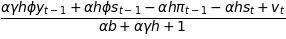

In [2]:
#Defining AD-curve
AD = sm.Eq(pi_t,(1/(h*alpha))*(v_t-(1+b*alpha)*y_t))
#Defining SRAS-curve
SRAS = sm.Eq(pi_t,pi_t2+gamma*y_t-phi*gamma*y_t2+s_t-phi*s_t2)
#Setting AD equal to SRAS and solving for equilibrium values of output, y*.
eq_1= sm.solve([AD, SRAS], [y_t, pi_t])
eq_y=eq_1[y_t]
print('The equilibrium for output y is:')
eq_y

The equilibrium for output pi is:


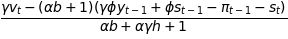

In [3]:
eq_pi=eq_1[pi_t]
print('The equilibrium for output pi is:')
eq_pi

In [ ]:
#lambdifying for use in question 3

pi_func = sm.lambdify((pi_t2, y_t2, v_t, s_t, s_t2, alpha, h, b, phi, gamma), eq_pi)
y_func = sm.lambdify((pi_t2, y_t2, v_t, s_t, s_t2, alpha, h, b, phi, gamma), eq_y)

Now, one an just set the paramter values to find the equilibrium given the paramter values

In [ ]:
#Setting parameter values

alpha = par['alpha']
h = par['h']
b = par['b']
phi = par['phi']
gamma = par['gamma']
#Resolving for equilibrium
AD_SRAS_val=sm.Eq((1/(h*alpha))*(v_t-(1+b*alpha)*y_t),pi_t2+gamma*y_t-phi*gamma*y_t2+s_t-phi*s_t2)
eq_y_val = sm.solve(AD_SRAS_val,y_t)
print('The equilibrium for output y given parameter values is:')
eq_y_val


The equilibrium for output y given parameter values is:


In [ ]:
eq_pi_val=1/(h*alpha)*(v_t-(1+b*alpha)*eq_y_val[0])
print('The equilibrium for output pi given parameter values is:')
eq_pi_val

The equilibrium for output pi given parameter values is:


## **Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

To find the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$, one needs to set the new values for the variables, and here, just re-solve the same problem as earlier. 

In [ ]:
#Setting variable values - parameter is similar to previous questions
pi_t2 = 0
y_t2 = 0
v_t = 0
s_t = 0
s_t2 = 0

#Solving for equilibrium given variable values 
AD_SRAS_param=sm.Eq((1/(h*alpha))*(v_t-(1+b*alpha)*y_t),pi_t2+gamma*y_t-phi*gamma*y_t2+s_t-phi*s_t2)
eq_y_param = sm.solve(AD_SRAS_param,y_t)
eq_pi_param=1/(h*alpha)*(v_t-(1+b*alpha)*eq_y_param[0])
print('The equilibrium for output y given parameter and variable values is: %8.3f' % eq_y_param[0])
print('The equilibrium for output pi given parameter and variable values is: %8.3f' % eq_pi_param)

The equilibrium for output y given parameter and variable values is:    0.000
The equilibrium for output pi given parameter and variable values is:    0.000


Now, one can investigate how the equilibrium changes when $v_t=0.1$

In [ ]:
#Solving for equilibrium given v_t=0.1
v_t2 = 0.1
AD_SRAS_param2=sm.Eq((1/(h*alpha))*(v_t2-(1+b*alpha)*y_t),pi_t2+gamma*y_t-phi*gamma*y_t2+s_t-phi*s_t2)
eq_y_param2 = sm.solve(AD_SRAS_param2,y_t)
eq_pi_param2=1/(h*alpha)*(v_t2-(1+b*alpha)*eq_y_param2[0])
print('The equilibrium for output y given parameter and variable values is: %8.4f' % eq_y_param2[0])
print('The equilibrium for output pi given parameter and variable values is: %8.4f' % eq_pi_param2)

The equilibrium for output y given parameter and variable values is:   0.0244
The equilibrium for output pi given parameter and variable values is:   0.0018


Now, lets illustrate the equilibrium. First, one creates a vector consisting of the equilibrium values for $y_t$ and $\pi_t$, respectively. Next step is to construct a illustration of the equilibrium values for given values of $v_t$.

In [ ]:
#Creating vector with equilibrium values for y_t and pi_t for given values of v_t
## Vector with equilibrium values for y
y_values=[]
y_values.append(eq_y_param[0])
y_values.append(eq_y_param2[0])
## Vector with equilibrium values for pi
pi_values=[]
pi_values.append(eq_pi_param)
pi_values.append(eq_pi_param2)


Text(0.5, 1.0, 'Equilibrium values for given values of $v_t$')

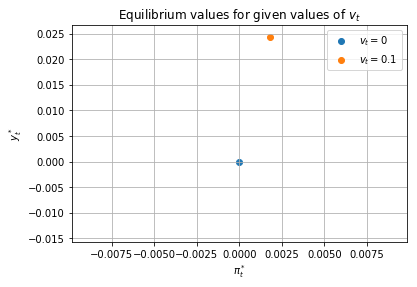

In [ ]:
#Creating illustration of the equilibrium values
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(pi_values[0], y_values[0], label='$v_t=0$')
ax.scatter(pi_values[1], y_values[1], label='$v_t=0.1$')

#Setting up illustration
ax.grid()
ax.legend()
ax.set_ylabel('$y_t^*$')
ax.set_xlabel('$\pi_t^*$')
ax.set_title('Equilibrium values for given values of $v_t$')

Skriv noget tekst her:

## **Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [ ]:
par['delta'] = 0.80
par['omega'] = 0.15
delta = par['delta']
omega = par['omega']

Firstly, one needs to define the demand and supply disturbances as functions, set the value for the shocks, the amount of periods for the simulation to investigate the evolvement of the economy given $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$. Then, one can simulate the model. This will also be the order of solution.

In [ ]:
#Defining demand and supply disturbances and vectors
v_t2 = sm.symbols('v_t2')
s_t2 = sm.symbols('s_t2')
v = lambda v_t2,x: delta*v_t2 + x
s = lambda s_t2,c: omega*s_t2 + c
v_vector = [0]
s_vector = [0]

#Defining amount of periods for simulation, demand and supply shock vectors. 
T = 200
x = np.zeros(T)
c = np.zeros(T)
x[1] = 0.1 

Now, one can run a loop to simulate the model for T periods.

In [ ]:
y_output = [0]
pi_inflation = [0]
#Running simulation of the model
for t in range (1,T):
    v_vector.append(v(v_vector[t-1], x[t]))
    s_vector.append(s(s_vector[t-1], c[t]))

In [ ]:
for t in range(1,T):
    y_output.append(y_func(pi_inflation[t-1], y_output[t-1], v_vector[t], s_vector[t], s_vector[t-1], alpha, h, b, phi, gamma))
    pi_inflation.append(pi_func(pi_inflation[t-1], y_output[t-1], v_vector[t], s_vector[t], s_vector[t-1], alpha, h, b, phi, gamma))

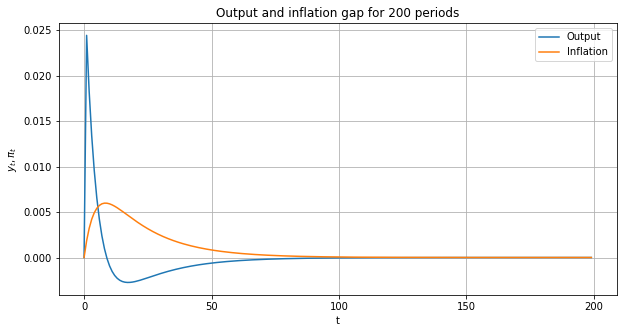

In [ ]:
#Creating illustration of the equilibrium values
fig = plt.figure(figsize= (10,5))
bx = fig.add_subplot(1,1,1)
bx.plot(range(0,200,1), y_output, label = 'Output')
bx.plot(range(0,200,1), pi_inflation, label = 'Inflation')

#Setting up illustration
bx.legend()
bx.grid()
bx.set_xlabel('t') # 
bx.set_ylabel('$y_t, \pi_t$')
bx.set_title('Output and inflation gap for 200 periods')
plt.xticks(range(0, 201, 50))
plt.show()

Skriv noget tekst her:

## **Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [ ]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2
sigma_x = par['sigma_x']
sigma_c = par['sigma_c']

The following will be more or less equal to the simulation. Just with the modelling of stochastic shocks which are normally distributed. Firstly, one define the stochastic process and then run the simulation

In [ ]:
#Defining stochastic shocks
np.random.seed(127)
T=1000
x = np.random.normal(loc = 0, scale=sigma_x, size =T)
c = np.random.normal(loc = 0, scale=sigma_c, size =T)

#Defining empty lists
v_vector2 = [0]
s_vector2 = [0]
pi_inflation2 = [0]
y_output2 = [0]

In [ ]:
 for t in range(1,T):
        v_vector2.append(v(v_vector2[t-1], x[t]))
        s_vector2.append(s(s_vector2[t-1], c[t]))

Now, one can start simulating the model for which a function, simulate, is defined.

In [ ]:
#Defining simulating function
def simulate(T,phi):
    for t in range(1,T):
        v_vector2.append(v(v_vector2[t-1], x[t]))
        s_vector2.append(s(s_vector2[t-1], c[t]))
    
        y_output2.append(y_func(pi_inflation2[t-1], y_output2[t-1], v_vector2[t], s_vector2[t], s_vector2[t-1], alpha, h, b, phi, gamma))
        pi_inflation2.append(pi_func(pi_inflation2[t-1], y_output2[t-1], v_vector2[t], s_vector2[t], s_vector2[t-1], alpha, h, b, phi, gamma))
    return y_output2, pi_inflation2

In [ ]:
#Simulation of the model
simulate(T,phi)

#Converting lists to arrays for printing
y_output_sol=np.array(y_output2)
pi_inflation_sol=np.array(pi_inflation2)

#Printung the results
print('Variance of y is %8.3f' % y_output_sol.var())
print('Variance of pi is %8.3f' % pi_inflation_sol.var())
print('Correlation between y and $\pi$ is %8.3f' % np.corrcoef(y_output_sol, pi_inflation_sol)[1,0])
print('Auto-correlation between $y_t$ and $y_t-1$ is %8.3f' % np.corrcoef(y_output_sol[1:], y_output_sol[:-1])[1,0])
print('Auto-correlation between $pi_t$ and $\pi_t-1$ is %8.3f' % np.corrcoef(pi_inflation_sol[1:], pi_inflation_sol[:-1])[1,0]) 

Variance of y is    1.993
Variance of pi is    1.039
Correlation between y and $\pi$ is   -0.167
Auto-correlation between $y_t$ and $y_t-1$ is    0.775
Auto-correlation between $pi_t$ and $\pi_t-1$ is    0.980


Skriv noget tekst her:

## **Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

In [ ]:
#Definning new phi and empty list for simulation
phi_new = np.linspace(0,1,T)
corr_ypi = [0]
corr_final = [0]
v_vector3 = [0]
s_vector3 = [0]
pi_inflation3 = [0]
y_output3 = [0]

In [ ]:
def simulate2(phi):
    for t in range(1,T):
        v_vector3.append(v(v_vector2[t-1], x[t]))
        s_vector3.append(s(s_vector2[t-1], c[t]))
    
        y_output3.append(y_func(pi_inflation3[t-1], y_output3[t-1], v_vector2[t], s_vector2[t], s_vector2[t-1], alpha, h, b, phi, gamma))
        pi_inflation3.append(pi_func(pi_inflation2[t-1], y_output2[t-1], v_vector2[t], s_vector2[t], s_vector2[t-1], alpha, h, b, phi, gamma))
   
    corr_ypi=np.corrcoef(y_output3, pi_inflation3)[1,0]
    return y_output3, pi_inflation3, corr_ypi

In [ ]:
v_vector3, s_vector3, corr_ypi = simulate2(phi)

In [ ]:
for i in phi_new:
    v_vector3, s_vector3, corr_ypi = simulate2(i)
    corr_final.append(corr_ypi)    

In [ ]:
#Creating illustration of the equilibrium values
fig = plt.figure(dpi=100)
cx = fig.add_subplot(1,1,1)
cx.plot(phi_new, corr_final, label = 'Correlation')

#Setting up illustration
cx.legend()
cx.grid()
cx.set_xlabel('\phi') # 
cx.set_ylabel('$Correlation between $y_t$ and $\pi_t$')
cx.set_title('Correlation for given values of $\phi$')
plt.show()